In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from data_analysis.utils import business
from data.paths.parquet_paths import BUSINESS
from data.paths.parquet_paths import CHECKIN

business_df = pd.read_parquet(str(BUSINESS))
business_df = business.prepare_business_df(business_df)

In [26]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, iBof5Tl8vrKISbi82tFEvQ to 9999
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        10000 non-null  object 
 1   address                     10000 non-null  object 
 2   city                        10000 non-null  object 
 3   state                       10000 non-null  object 
 4   postal_code                 10000 non-null  object 
 5   latitude                    10000 non-null  float32
 6   longitude                   10000 non-null  float32
 7   stars                       10000 non-null  float32
 8   review_count                10000 non-null  float64
 9   is_open                     20000 non-null  object 
 10  categories                  10000 non-null  object 
 11  hours                       7716 non-null   object 
 12  AcceptsInsurance            413 non-null    object 
 13  AgesAllowed     

In [27]:
business_df.isna().sum()

name                          10000
address                       10000
city                          10000
state                         10000
postal_code                   10000
latitude                      10000
longitude                     10000
stars                         10000
review_count                  10000
is_open                           0
categories                    10000
hours                         12284
AcceptsInsurance              19587
AgesAllowed                   19992
Alcohol                       17633
Ambience                      17490
BYOB                          19962
BYOBCorkage                   19927
BestNights                    19749
BikeParking                   15815
BusinessAcceptsBitcoin        19192
BusinessAcceptsCreditCards    14159
BusinessParking               14623
ByAppointmentOnly             17173
Caters                        17952
CoatCheck                     19792
Corkage                       19948
DietaryRestrictions         

### Variables - helpers

In [28]:
name = 'name'
address = 'address'
city = 'city'
state = 'state'
postal_code = 'postal_code'
latitude = 'latitude'
longitude = 'longitude'
stars = 'stars'
review_count = 'review_count'
is_open = 'is_open'
categories = 'categories'
hours = 'hours'
AcceptsInsurance = 'AcceptsInsurance'
AgesAllowed = 'AgesAllowed'
Alcohol = 'Alcohol'
Ambience = 'Ambience'
BYOB = 'BYOB'
BYOBCorkage = 'BYOBCorkage'
BestNights = 'BestNights'
BikeParking = 'BikeParking'
BusinessAcceptsBitcoin = 'BusinessAcceptsBitcoin'
BusinessAcceptsCreditCards = 'BusinessAcceptsCreditCards'
BusinessParking = 'BusinessParking'
ByAppointmentOnly = 'ByAppointmentOnly'
Caters = 'Caters'
CoatCheck = 'CoatCheck'
Corkage = 'Corkage'
DietaryRestrictions = 'DietaryRestrictions'
DogsAllowed = 'DogsAllowed'
DriveThru = 'DriveThru'
GoodForDancing = 'GoodForDancing'
GoodForKids = 'GoodForKids'
GoodForMeal = 'GoodForMeal'
HairSpecializesIn = 'HairSpecializesIn'
HappyHour = 'HappyHour'
HasTV = 'HasTV'
Music = 'Music'
NoiseLevel = 'NoiseLevel'
Open24Hours = 'Open24Hours'
OutdoorSeating = 'OutdoorSeating'
RestaurantsAttire = 'RestaurantsAttire'
RestaurantsCounterService = 'RestaurantsCounterService'
RestaurantsDelivery = 'RestaurantsDelivery'
RestaurantsGoodForGroups = 'RestaurantsGoodForGroups'
RestaurantsPriceRange2 = 'RestaurantsPriceRange2'
RestaurantsReservations = 'RestaurantsReservations'
RestaurantsTableService = 'RestaurantsTableService'
RestaurantsTakeOut = 'RestaurantsTakeOut'
Smoking = 'Smoking'
WheelchairAccessible = 'WheelchairAccessible'
WiFi = 'WiFi'

In [29]:
business_df[[stars, review_count]].describe()

,stars,review_count
count,10000.00000,10000.000000
mean,3.55045,35.067600
std,1.01852,103.118055
min,1.00000,3.000000
25%,3.00000,4.000000
50%,3.50000,9.000000
75%,4.50000,26.000000
max,5.00000,4138.000000


In [30]:
business_df.sample(3)

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,not_verified,young
5417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,open,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,False,True
4087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,open,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False
5uEbrBUTK6NVEd6LpaGVoQ,Visca A/C,11619 N 20th Ave,Phoenix,AZ,85029,33.591915,-112.101913,4.5,6.0,open,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,True,False


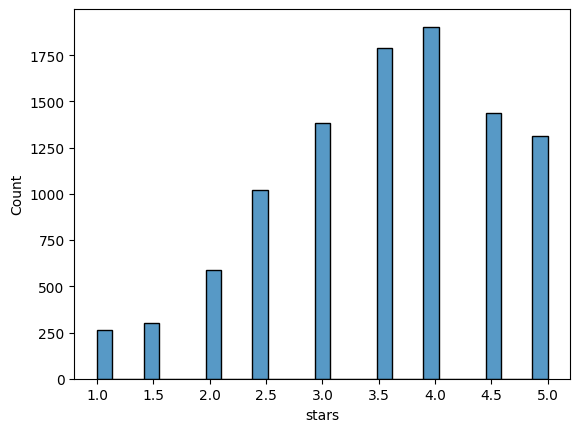

In [31]:
sns.histplot(data=business_df, x=stars)
plt.show()

review_count_median=9.0


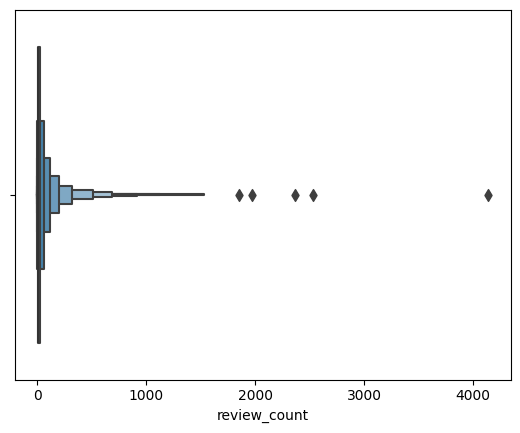

In [32]:
review_count_median = business_df[review_count].median()
print(f"{review_count_median=}")

sns.boxenplot(data=business_df, x=review_count)
plt.show()

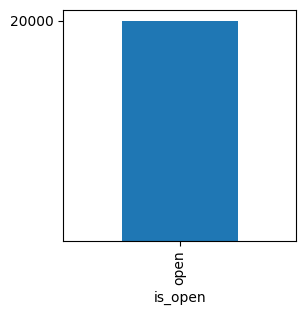

In [33]:
business_df[is_open] = business_df[is_open].apply(lambda x: 'open' if x else 'closed')

y = business_df.groupby(is_open)[is_open].count().values.tolist()
fig, ax = plt.subplots(figsize=(3, 3))
business_df.groupby(is_open)[is_open].count().plot(kind='bar', ax=ax).set_yticks(y)
plt.show()

In [34]:
checkin_df = pd.read_parquet(str(CHECKIN))

In [35]:
from datetime import datetime, timedelta

verifying_threshold = 10
business_df['not_verified'] = business_df[review_count].transform(lambda x:
    (x < verifying_threshold))

business_and_checkin = business_df.join(checkin_df, rsuffix='_checkin')
business_and_checkin['date'] = business_and_checkin['date'].dropna().apply(lambda x: x[0])
business_and_checkin['date'] = pd.to_datetime(business_and_checkin['date'])

youth_threshold = timedelta(days=365)
dataset_date = business_and_checkin['date'].max()

business_df['young'] = business_and_checkin['date'].transform(lambda x:
   None if x is None else dataset_date - x < youth_threshold)

print(business_df['not_verified'].sample(10))
print(business_df['young'].sample(10))

E7Y2XFkTdKCXZyOSuv1lHQ    False
m-HMvJPKy5e7XXk8-jr9BA    False
5703                      False
5878                      False
lVaHDON2mxLr5mneUnawKg     True
AUUxwOl_k7-x-jktrVHFyg     True
605                       False
9431                      False
764                       False
prjaJmqTAnYdeLrWp8_MlA     True
Name: not_verified, dtype: bool
lZwjDCAna4K9V5A-rj0-vQ    False
2475                      False
UiAcw5clXtPReXfI11jTcw    False
7818                      False
YQ1-0XXDpXtf_guBb5s9Qg    False
6043                      False
5033                       True
O7R1GSR7FXQ2tlqESut0Yg    False
5675                      False
rWv_gyrp3ZX0vN4IBR8mDQ    False
Name: young, dtype: bool
